<a href="https://colab.research.google.com/github/FraGoTe/redes-neuronales/blob/master/RNR_LSTM_ACCION_NASDAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## REDES NEURONALES RECURRENTES


Carga de Datos:

In [1]:
%%bash
if [ ! -f "Google_Stock_Price_Test.csv" ]; then
    wget www.fragote.com/data/Google_Stock_Price_Test.csv
fi
if [ ! -f "Google_Stock_Price_Train.csv" ]; then
    wget www.fragote.com/data/Google_Stock_Price_Train.csv
fi

ls -l 

total 156
-rw-r--r-- 1 root root  11409 Nov 23 17:54 Google_Stock_Price_Test.csv
-rw-r--r-- 1 root root 141323 Nov 23 17:46 Google_Stock_Price_Train.csv
drwxr-xr-x 1 root root   4096 Nov 21 16:30 sample_data


--2019-11-23 19:25:18--  http://www.fragote.com/data/Google_Stock_Price_Test.csv
Resolving www.fragote.com (www.fragote.com)... 174.142.207.107
Connecting to www.fragote.com (www.fragote.com)|174.142.207.107|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fragote.com/data/Google_Stock_Price_Test.csv [following]
--2019-11-23 19:25:24--  https://www.fragote.com/data/Google_Stock_Price_Test.csv
Connecting to www.fragote.com (www.fragote.com)|174.142.207.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11409 (11K) [text/csv]
Saving to: ‘Google_Stock_Price_Test.csv’

     0K .......... .                                          100% 31.4M=0s

2019-11-23 19:25:24 (31.4 MB/s) - ‘Google_Stock_Price_Test.csv’ saved [11409/11409]

--2019-11-23 19:25:24--  http://www.fragote.com/data/Google_Stock_Price_Train.csv
Resolving www.fragote.com (www.fragote.com)... 174.142.207.107
Connecting to www.fragote.com (www.fragot

Mostrando lista de archivos:



---

 ## PARTE I - PREPROCESAMIENTO DE DATOS
 

---



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importando dataset

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

print(dataset_train.head(10))
print(dataset_train.iloc[:, 1:2].values)

# Considerando el precio de apertura "Open"
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
# Estandarización: (x-u)/dev
# Normalización: (x-min)/(max-min) --> feature_range [0 - 1]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Estructura de 60 datos de entrada (t) y 1 dato de salida (t+1)  X[1-60] --> y[61]
train_len = len(dataset_train)
amplitude = 60

print("Número de elementos de la serie (Train): ", train_len)
print("Amplitud: ", amplitude)

X_train = []
y_train = []

for i in range(amplitude, train_len):
    X_train.append(training_set_scaled[i-amplitude:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Redimensionando X_train (train_len,amplitude,1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print ("Dimensión de X_train: ",X_train.shape)

         Date        Open        High         Low       Close    Volume
0  04/01/2010  313.788788  315.070068  312.432434  313.688690   3908400
1  05/01/2010  313.903900  314.234222  311.081085  312.307312   6003300
2  06/01/2010  313.243256  313.243256  303.483490  304.434448   7949400
3  07/01/2010  305.005005  305.305298  296.621613  297.347351  12815700
4  08/01/2010  296.296295  301.926941  294.849854  301.311310   9439100
5  11/01/2010  302.532532  302.532532  297.317322  300.855865  14411300
6  12/01/2010  299.124115  299.379395  294.294281  295.535522   9696800
7  13/01/2010  288.533539  294.484497  287.237244  293.838837  12980200
8  14/01/2010  292.242249  297.397400  291.696686  295.220215   8471700
9  15/01/2010  296.966980  297.077087  289.309296  290.290283  10858100
[[ 313.788788]
 [ 313.9039  ]
 [ 313.243256]
 ...
 [1026.199951]
 [1059.5     ]
 [1057.829956]]
Número de elementos de la serie (Train):  2264
Amplitud:  60
Dimensión de X_train:  (2204, 60, 1)




---

## PARTE II - CONSTRUYENDO LA RED NEURONAL RECURRENTE
 

---



In [3]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# inicializando the RNN
rnn_model = Sequential()

# 1ra capa LSTM y Dropout para regularización.
# input_shape (amplitude,1)
rnn_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% de las neuronas seran ignoradas durante el training (20%xNodos = 10)
# Para hacer menos probable el overfiting
rnn_model.add(Dropout(rate=0.2))

# 2da capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 35, return_sequences = True))
rnn_model.add(Dropout(rate=0.2))

# 3ra capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 35, return_sequences = True))
rnn_model.add(Dropout(rate=0.2))

# 4ta capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 35, return_sequences = False))
rnn_model.add(Dropout(rate=0.2))

# Output layer
rnn_model.add(Dense(units = 1))

rnn_model.summary()

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 35)            12040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 35)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 35)            9940      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 35)            0         
_

In [4]:
import datetime
print('Iniciando a las: ', datetime.datetime.now())
print("...")

# Compiling the RNN
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenamiento de la RNN con nuestro Training set
rnn_model.fit(X_train, y_train, epochs = 100, batch_size = 48)

print("...")
print('Terminando a las: ', datetime.datetime.now())


Iniciando a las:  2019-11-23 19:26:32.636128
...

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





2204/2204 [==============================] - 21s 10ms/step - loss: 0.0256
Epoch 2/100
2204/2204 [==============================] - 15s 7ms/step - loss: 0.0036
Epoch 3/100
2204/2204 [==============================] - 15s 7ms/step - loss: 0.0037
Epoch 4/100
2204/2204 [==============================] - 15s 7ms/step - loss: 0.0031
Epoch 5/100
2204/2204 [==============================] - 15s 7ms/step - loss: 0.0029
Epoch 6/100
2204/2204 [==============================] - 15s 7ms/step - loss: 0.0026
Epoch 7/100
2204/2204 [==============================] - 15s 7ms/step - loss: 0.0030
Epoch 8/100
2204/2204 [==============================] - 15s 7ms/step - loss: 0.0025
Epoch 9/100
2204/2204 [==============================] - 15s 7ms/step - loss: 0.0027
Epoch 10/100
2204/2204 [==============================] - 15s 7ms/step - loss: 0.0

---

 ## PARTE III - PREDICCIONES Y VISUALIZACION DE RESULTADOS
 

---




In [6]:
# Precio de Acción reales (2019)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

test_len = len(dataset_test)
print("Número de elementos de la serie (Test): ", test_len)

# Precio de Acción pronosticados (2019)
# Concatenar en un solo vector (train + test)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

# Obteniendo los 60 datos anteriores al primer elemento del Test set
inputs = dataset_total[len(dataset_total) - test_len - amplitude:].values

# Redimensionando de (x,) --> (x,1)
inputs = inputs.reshape(-1,1)

# Feature Scaling
inputs = sc.transform(inputs)

X_test = []

for i in range(0, test_len):
    X_test.append(inputs[i:i+amplitude, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print ("Dimensión de X_test: ",X_test.shape)

predicted_stock_price = rnn_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Número de elementos de la serie (Test):  178
Dimensión de X_test:  (178, 60, 1)


---

 #### VISUALIZACION DE RESULTADOS
 

---

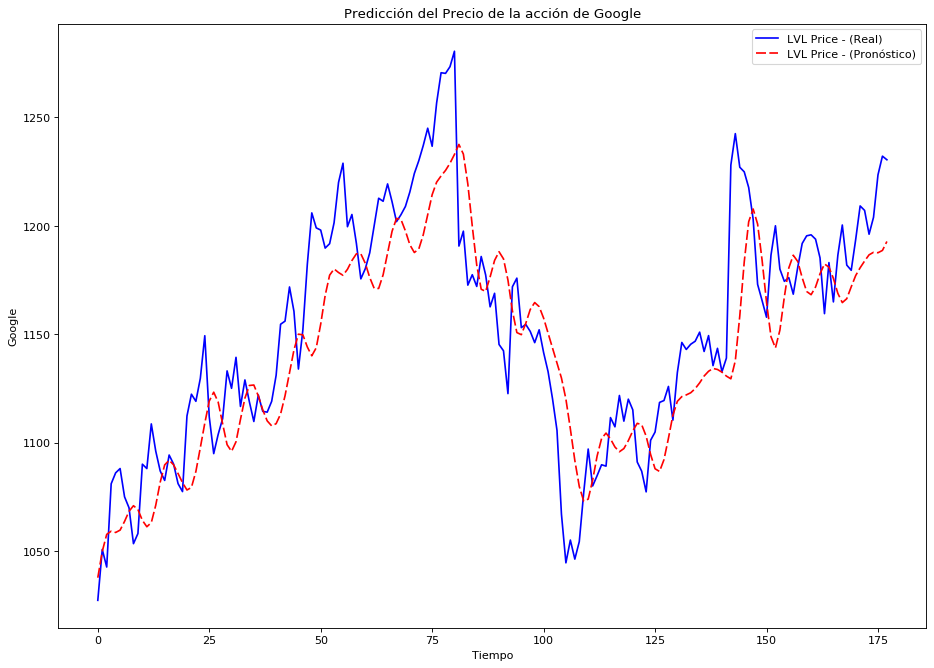

In [8]:
# Visualizando resultados
plt.figure(figsize=(14,10),dpi=80)
plt.plot(real_stock_price, color = 'blue', label = 'LVL Price - (Real)')
plt.plot(predicted_stock_price, color = 'red', label = 'LVL Price - (Pronóstico)', dashes=[6, 2])
plt.title('Predicción del Precio de la acción de Google')
plt.xlabel('Tiempo')
plt.ylabel('Google')
plt.legend()
plt.show()

---

 #### RMSE
 

---

In [9]:
# RMSE
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print ("rmse: ", rmse)

rmse:  29.1912909976391
